In [1]:
import pandas as pd
import csv
import statsmodels.api as sm

from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


import json
import pandas as pd
import itertools
import csv
import string
import pickle
import matplotlib.pyplot as plt

from collections import Counter
import re
import spacy
import nltk
from spacy.lang.en import English
from nltk.util import ngrams
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
nltk.download('wordnet')
nltk.download('stopwords')

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

[nltk_data] Downloading package wordnet to /Users/xzhou/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/xzhou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
file_url = '/Users/xzhou/github/project_archives/files_airbnb/{}.csv'

sf_file = file_url.format('sf_airbnb/reviews')
ok_file = file_url.format('ok_airbnb/reviews')
sc_file = file_url.format('sc_airbnb/reviews')
scz_file = file_url.format('scz_airbnb/reviews')
pg_file = file_url.format('pg_airbnb/reviews')
sd_file = file_url.format('sd_airbnb/reviews')
la_file = file_url.format('la_airbnb/reviews')

In [3]:
reviews_sf = pd.read_csv(sf_file)
reviews_ok = pd.read_csv(ok_file)
reviews_sc = pd.read_csv(sc_file)
reviews_scz = pd.read_csv(scz_file)

In [4]:
print (reviews_sf.shape, reviews_ok.shape, reviews_sc.shape, reviews_scz.shape)

(278884, 6) (78491, 6) (135238, 6) (76086, 6)


In [5]:
frames = [reviews_sf, reviews_ok, reviews_sc, reviews_scz]
keys = ['reviews_sf', 'reviews_ok', 'reviews_sc', 'reviews_scz']

In [6]:
df_reviews = pd.concat(frames, keys=keys)

In [7]:
df_reviews

listing_id         id        date  reviewer_id  \
reviews_sf  0             958       5977  2009-07-23        15695   
            1             958       6660  2009-08-03        26145   
            2             958      11519  2009-09-27        25839   
            3             958      16282  2009-11-05        33750   
            4             958      26008  2010-02-13        15416   
            5             958      29240  2010-03-13        78623   
            6             958      32988  2010-04-03        96027   
            7             958     220443  2011-04-08       426888   
            8             958     567690  2011-09-26       539189   
            9             958    1786860  2012-07-24      2059845   
            10            958    2214082  2012-09-06      2869693   
            11            958    2263537  2012-09-11      2953444   
            12            958    3553733  2013-02-16       134792   
            13            958    4392049  2013-05-02      1635153   
            14            958    5040421  2013-06-09      6413536   
            15            958    5171535  2013-06-16      5975179   
            16            958    5267286  2013-06-21      4549217   
            17            958    5905160  2013-07-22      5685916   
            18            958    5996571  2013-07-25      7347557   
            19            958    7364408  2013-09-17      4499842   
            20            958    7817720  2013-10-04      8876124   
            21            958    9049799  2013-12-03      7519331   
            22            958   12766593  2014-05-10      6745838   
            23            958   12984959  2014-05-16      1197498   
            24            958   14349227  2014-06-17      3807407   
            25            958   14492437  2014-06-20       636100   
            26            958   16609563  2014-07-30      2253567   
            27            958   16843898  2014-08-03     14189953   
            28            958   19415506  2014-09-12     16800225   
            29            958   19869583  2014-09-20     15095345   
...                       ...        ...         ...          ...   
reviews_scz 76056    27471758  310646750  2018-08-19    163356469   
            76057    27471758  311668980  2018-08-21    152494351   
            76058    27471758  313665329  2018-08-25     17634020   
            76059    27519397  308088346  2018-08-15     55345305   
            76060    27519397  310704892  2018-08-19      7675531   
            76061    27519397  314479374  2018-08-26     66223381   
            76062    27550526  313609742  2018-08-25     58929446   
            76063    27550526  315046236  2018-08-27     11482521   
            76064    27555531  310582834  2018-08-19    204628642   
            76065    27555531  313096873  2018-08-24      2657854   
            76066    27555531  313639756  2018-08-25    173525529   
            76067    27555531  314419633  2018-08-26    145519968   
            76068    27570063  307612122  2018-08-14     30642128   
            76069    27570063  308591741  2018-08-16    143830772   
            76070    27570063  309731764  2018-08-18     20416716   
            76071    27570063  310693419  2018-08-19    141011277   
            76072    27575829  313086228  2018-08-24    210644308   
            76073    27579697  313069760  2018-08-24    127899015   
            76074    27579697  314515121  2018-08-26    142685695   
            76075    27599937  308585667  2018-08-16      1914532   
            76076    27599937  311250266  2018-08-20      2005105   
            76077    27599937  314450942  2018-08-26     63788249   
            76078    27599937  315041025  2018-08-27     22059905   
            76079    27697491  310554202  2018-08-19    188302959   
            76080    27697491  312569280  2018-08-23    149340721   
            76081    27697491  314505862  2018-08-26    199620951   
            76082

In [8]:
df_reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [9]:
columns_to_drop=['id', 'date', 'reviewer_id', 'reviewer_name']

In [10]:
df_reviews.drop(columns_to_drop, axis=1, inplace=True)

In [11]:
# Drop Null values in reviews

df_reviews.dropna(inplace=True)

In [12]:
df_reviews.shape

(568165, 2)

In [13]:
pkl_file = '/Users/xzhou/github/project_archives/files_airbnb/{}.csv'

pkl_listings = pkl_file.format('all_listings')

df_listings = pd.read_pickle(pkl_listings)
df_listings.head()

,id,host_response_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,...,instant_bookable_f,is_business_travel_ready_f,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_f,require_guest_phone_verification_f
0,958,0.92,1,3,1.0,1.0,2.0,170.0,1,2.00000,...,1,1,0,1,0,0,0,0,1,1
1,5858,1.00,2,5,1.0,2.0,3.0,235.0,1,2.00000,...,1,1,0,0,0,1,0,0,1,1
2,7918,1.00,10,2,4.0,1.0,1.0,65.0,1,1.69897,...,1,1,0,0,0,1,0,0,1,1
3,8142,1.00,10,2,4.0,1.0,1.0,65.0,1,1.69897,...,1,1,0,0,0,1,0,0,1,1
5,8567,0.80,1,6,1.0,2.0,3.0,255.0,0,2.09691,...,1,1,0,1,0,0,0,0,1,1


In [14]:
df_listings.shape

(10352, 318)

In [15]:
df_listings_reviews = df_listings.merge(df_reviews, how='left', left_on='id', right_on='listing_id')

In [16]:
df_listings_reviews.drop(['listing_id'], axis=1, inplace=True)
df_listings_reviews.head()

,id,host_response_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,...,is_business_travel_ready_f,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_f,require_guest_phone_verification_f,comments
0,958,0.92,1,3,1.0,1.0,2.0,170.0,1,2.0,...,1,0,1,0,0,0,0,1,1,"Our experience was, without a doubt, a five st..."
1,958,0.92,1,3,1.0,1.0,2.0,170.0,1,2.0,...,1,0,1,0,0,0,0,1,1,Returning to San Francisco is a rejuvenating t...
2,958,0.92,1,3,1.0,1.0,2.0,170.0,1,2.0,...,1,0,1,0,0,0,0,1,1,We were very pleased with the accommodations a...
3,958,0.92,1,3,1.0,1.0,2.0,170.0,1,2.0,...,1,0,1,0,0,0,0,1,1,We highly recommend this accomodation and agre...
4,958,0.92,1,3,1.0,1.0,2.0,170.0,1,2.0,...,1,0,1,0,0,0,0,1,1,Holly's place was great. It was exactly what I...


In [17]:
df_listings_reviews.isnull().sum()

id                                                 0
host_response_rate                                 0
host_listings_count                                0
accommodates                                       0
bathrooms                                          0
bedrooms                                           0
beds                                               0
price                                              0
security_deposit                                   0
cleaning_fee                                       0
guests_included                                    0
minimum_nights                                     0
number_of_reviews                                  0
calculated_host_listings_count                     0
reviews_per_month                                  0
Air conditioning                                   0
Bed linens                                         0
Cable TV                                           0
Carbon monoxide detector                      

In [18]:
df_listings_reviews.dropna(inplace=True)

In [19]:
# Drop any possible duplicate lines before saving the result

df_listings_reviews = df_listings_reviews.drop_duplicates()
df_listings_reviews.shape

(486895, 319)

In [20]:
pkl_file = '/Users/xzhou/github/project_archives/files_airbnb/{}.csv'

pkl_path = pkl_file.format('listings_reviews')

pd.to_pickle(df_listings_reviews, pkl_path)

In [21]:
# Filter to smaller subset of data. Goal is to understand the main topics within each sentiment

df_smaller = df_listings_reviews.loc[:, ['id', 'review_scores_rating_log10', 'comments']]
df_smaller.head()

,id,review_scores_rating_log10,comments
0,958,1.986772,"Our experience was, without a doubt, a five st..."
1,958,1.986772,Returning to San Francisco is a rejuvenating t...
2,958,1.986772,We were very pleased with the accommodations a...
3,958,1.986772,We highly recommend this accomodation and agre...
4,958,1.986772,Holly's place was great. It was exactly what I...


In [22]:
def sentiment(x):
    """
    This is to assignment sentiment based on rating scores.
    Since ratings score has been taken log10, thus needs to apply
    this on cutoff values as well
    """
    if x>np.log10(50) and x<np.log10(60):
        return 'neutral'
    if x>=np.log10(60):
        return 'positive'
    if x<=np.log10(50):
        return 'negative'

In [23]:
def sentiment_score(x):
    """
    This is to assign numerical value to each sentiment category.
    """
    if x == 'neutral':
        return 0
    elif x == 'positive':
        return 1
    elif x == 'negative':
        return (-1)
    else:
        return 'error'

In [24]:
df_smaller['sentiment'] = df_smaller.review_scores_rating_log10.apply(lambda x: sentiment(x))

In [25]:
df_smaller['sentiment_score'] = df_smaller.sentiment.apply(lambda x: sentiment_score(x))

In [26]:
df_smaller.head()

,id,review_scores_rating_log10,comments,sentiment,sentiment_score
0,958,1.986772,"Our experience was, without a doubt, a five st...",positive,1
1,958,1.986772,Returning to San Francisco is a rejuvenating t...,positive,1
2,958,1.986772,We were very pleased with the accommodations a...,positive,1
3,958,1.986772,We highly recommend this accomodation and agre...,positive,1
4,958,1.986772,Holly's place was great. It was exactly what I...,positive,1


In [27]:
df_pos = df_smaller[df_smaller['sentiment_score']==1]
df_neg = df_smaller[df_smaller['sentiment_score']==-1]
print(df_pos.shape, df_neg.shape)

(486754, 5) (130, 5)


In [28]:
df_smaller.describe (include='all')

,id,review_scores_rating_log10,comments,sentiment,sentiment_score
count,4.868950e+05,486895.000000,486895,486895,486895.000000
unique,NaN,NaN,477561,3,NaN
top,NaN,NaN,Great place!,positive,NaN
freq,NaN,NaN,294,486754,NaN
mean,8.482491e+06,1.981698,NaN,NaN,0.999443
std,7.081411e+06,0.031595,NaN,NaN,0.033019
min,9.580000e+02,0.000000,NaN,NaN,-1.000000
25%,2.000765e+06,1.977724,NaN,NaN,1.000000
50%,6.936417e+06,1.986772,NaN,NaN,1.000000
75%,1.409545e+07,1.991226,NaN,NaN,1.000000


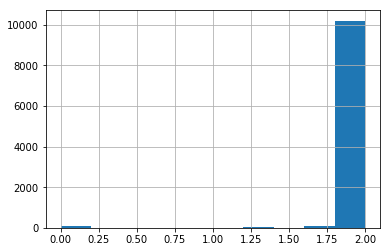

In [29]:
# Get an understanding of rating distribution. It seems majority of ratings are very positive
# The data is limited and wouldn't be helpful to understand customers' negatie sentiment

df_smaller.groupby(by='id').review_scores_rating_log10.first().hist()

In [30]:
# File after comparing listings and seasonality. 
# Because there are too many reviews to process, 
# this is to help narrow down number of reviews to analyze

pkl_file = '/Users/xzhou/github/project_archives/files_airbnb/{}.pkl'
pkl_path = pkl_file.format('listings_seasonality')

try: 
    with open(pkl_path, 'rb') as file:
        df_listings_seasonality = pd.read_pickle(file)
except:
    with open(pkl_path, 'wb') as file:
        pd.to_pickle(df_final, file)

In [31]:
df_listings_seasonality.columns

Index(['listing_id', 'price_by_month_week', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       ...
       'instant_bookable_f', 'is_business_travel_ready_f',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict',
       'cancellation_policy_strict_14_with_grace_period',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60',
       'require_guest_profile_picture_f',
       'require_guest_phone_verification_f'],
      dtype='object', length=354)

In [32]:
listing_id_interested = df_listings_seasonality.listing_id.unique()

In [33]:
len(listing_id_interested)

3262

In [34]:
df_smaller = df_smaller[df_smaller['id'].isin(listing_id_interested)]

In [35]:
df_smaller.shape

(165816, 5)

In [39]:
df_smaller.id.nunique()

2846

In [40]:
# Break down reviews by word. 
# Goal is to remove reviews that don't have meaningful length

df_smaller['comments_words_ind_review'] = df_smaller['comments'].apply(nltk.word_tokenize)

In [41]:
# Perform a word count for each review. 
# This is to remove reviews that don't have meaningful leangh

df_smaller['word_count_ind_review'] = df_smaller['comments_words_ind_review'].apply(len)
df_smaller.head()

,id,review_scores_rating_log10,comments,sentiment,sentiment_score,comments_words_ind_review,word_count_ind_review
152,5858,1.991226,We had a fabulous time staying with Philip and...,positive,1,"[We, had, a, fabulous, time, staying, with, Ph...",91
153,5858,1.991226,Great place to stay in SF. Tania and Philip we...,positive,1,"[Great, place, to, stay, in, SF, ., Tania, and...",67
154,5858,1.991226,We had an excellent stay. We loved the neighbo...,positive,1,"[We, had, an, excellent, stay, ., We, loved, t...",54
155,5858,1.991226,Tania and Philip are wonderful and cheerful - ...,positive,1,"[Tania, and, Philip, are, wonderful, and, chee...",72
156,5858,1.991226,We enjoyed the great location and peaceful int...,positive,1,"[We, enjoyed, the, great, location, and, peace...",29


In [42]:
df_smaller.shape

(165816, 7)

In [43]:
# Keep only comments that have meaningful length

df_smaller = df_smaller[df_smaller['word_count_ind_review']>=10]
df_smaller.shape

(153298, 7)

In [44]:
# Concolidate all reviews belong to a single 'id' to one big comment. 
# This for easier processing later on

df_consolicated_reviews = df_smaller.groupby('id').comments.apply(lambda x: ' ,'.join(x)).reset_index()

In [45]:
df_consolicated_reviews.head()

,id,comments
0,5858,We had a fabulous time staying with Philip and...
1,7918,My stay was fantastic! The neighborhood is gr...
2,8142,"Excellent! The space is clean and quiet, and t..."
3,9225,"Wow, what a treat to stay in a place where eve..."
4,10251,we had a great experience. sarah and ramon wer...


In [46]:
df_consolicated_reviews.shape

(2796, 2)

In [67]:
df_final = pd.merge(left = df_smaller, right = df_consolicated_reviews, how='left', left_on ='id', right_on = 'id')

In [68]:
df_final.shape

(153298, 8)

In [69]:
df_final.head()

,id,review_scores_rating_log10,comments_x,sentiment,sentiment_score,comments_words_ind_review,word_count_ind_review,comments_y
0,5858,1.991226,We had a fabulous time staying with Philip and...,positive,1,"[We, had, a, fabulous, time, staying, with, Ph...",91,We had a fabulous time staying with Philip and...
1,5858,1.991226,Great place to stay in SF. Tania and Philip we...,positive,1,"[Great, place, to, stay, in, SF, ., Tania, and...",67,We had a fabulous time staying with Philip and...
2,5858,1.991226,We had an excellent stay. We loved the neighbo...,positive,1,"[We, had, an, excellent, stay, ., We, loved, t...",54,We had a fabulous time staying with Philip and...
3,5858,1.991226,Tania and Philip are wonderful and cheerful - ...,positive,1,"[Tania, and, Philip, are, wonderful, and, chee...",72,We had a fabulous time staying with Philip and...
4,5858,1.991226,We enjoyed the great location and peaceful int...,positive,1,"[We, enjoyed, the, great, location, and, peace...",29,We had a fabulous time staying with Philip and...


In [70]:
# Since we have consolidated reviews. Only keep one consolidated review per Listing ID

df_final.drop_duplicates(subset=['comments_y'], keep='first', inplace=True)

In [71]:
df_final.shape

(2793, 8)

In [72]:
df_final.head(10)

,id,review_scores_rating_log10,comments_x,sentiment,sentiment_score,comments_words_ind_review,word_count_ind_review,comments_y
0,5858,1.991226,We had a fabulous time staying with Philip and...,positive,1,"[We, had, a, fabulous, time, staying, with, Ph...",91,We had a fabulous time staying with Philip and...
110,7918,1.929419,My stay was fantastic! The neighborhood is gr...,positive,1,"[My, stay, was, fantastic, !, The, neighborhoo...",23,My stay was fantastic! The neighborhood is gr...
126,8142,1.959041,"Excellent! The space is clean and quiet, and t...",positive,1,"[Excellent, !, The, space, is, clean, and, qui...",28,"Excellent! The space is clean and quiet, and t..."
133,9225,1.968483,"Wow, what a treat to stay in a place where eve...",positive,1,"[Wow, ,, what, a, treat, to, stay, in, a, plac...",137,"Wow, what a treat to stay in a place where eve..."
525,10251,1.977724,we had a great experience. sarah and ramon wer...,positive,1,"[we, had, a, great, experience, ., sarah, and,...",37,we had a great experience. sarah and ramon wer...
803,10832,1.963788,This beautiful loft comfortably slept the 3 of...,positive,1,"[This, beautiful, loft, comfortably, slept, th...",37,This beautiful loft comfortably slept the 3 of...
819,12042,1.806180,Aaron was a great host during my month in San ...,positive,1,"[Aaron, was, a, great, host, during, my, month...",63,Aaron was a great host during my month in San ...
824,12584,1.968483,The house has an amazing view... really lovely...,positive,1,"[The, house, has, an, amazing, view, ..., real...",91,The house has an amazing view... really lovely...
838,14125,1.991226,Olivia provided a very warm experience for our...,positive,1,"[Olivia, provided, a, very, warm, experience, ...",54,Olivia provided a very warm experience for our...
927,21914,1.892095,I was happy with my stay at Aaron's place !!! ...,positive,1,"[I, was, happy, with, my, stay, at, Aaron, 's,...",86,I was happy with my stay at Aaron's place !!! ...


In [73]:
# Drop un-used columns. 'Comments-words' need to be dropped, as this is
# for individual review, not consolidated review.

columns_to_drop = ['comments_x', 'comments_words_ind_review', 'word_count_ind_review']
df_final.drop (columns_to_drop, axis=1, inplace=True)
df_final.head()

,id,review_scores_rating_log10,sentiment,sentiment_score,comments_y
0,5858,1.991226,positive,1,We had a fabulous time staying with Philip and...
110,7918,1.929419,positive,1,My stay was fantastic! The neighborhood is gr...
126,8142,1.959041,positive,1,"Excellent! The space is clean and quiet, and t..."
133,9225,1.968483,positive,1,"Wow, what a treat to stay in a place where eve..."
525,10251,1.977724,positive,1,we had a great experience. sarah and ramon wer...


In [74]:
df_final.rename( index=str, columns ={'comments_y': 'reviews_consol'}, inplace=True)
df_final.head()

,id,review_scores_rating_log10,sentiment,sentiment_score,reviews_consol
0,5858,1.991226,positive,1,We had a fabulous time staying with Philip and...
110,7918,1.929419,positive,1,My stay was fantastic! The neighborhood is gr...
126,8142,1.959041,positive,1,"Excellent! The space is clean and quiet, and t..."
133,9225,1.968483,positive,1,"Wow, what a treat to stay in a place where eve..."
525,10251,1.977724,positive,1,we had a great experience. sarah and ramon wer...


In [75]:
# Noted too few negative reviews. This won't be useful for sentiment analysis

df_pos = df_final[df_final['sentiment_score']==1]
df_neg = df_final[df_final['sentiment_score']==-1]
print(df_pos.shape, df_neg.shape)

(2765, 5) (26, 5)


In [76]:
# Break down reviews by word. 

df_final['review_words_consol'] = df_final['reviews_consol'].apply(nltk.word_tokenize)

In [77]:
# Perform a word count for each review. 
# This is to remove reviews that don't have meaningful leangh

df_final['word_count_consol'] = df_final['review_words_consol'].apply(len)
df_final.head()

,id,review_scores_rating_log10,sentiment,sentiment_score,reviews_consol,review_words_consol,word_count_consol
0,5858,1.991226,positive,1,We had a fabulous time staying with Philip and...,"[We, had, a, fabulous, time, staying, with, Ph...",7467
110,7918,1.929419,positive,1,My stay was fantastic! The neighborhood is gr...,"[My, stay, was, fantastic, !, The, neighborhoo...",1115
126,8142,1.959041,positive,1,"Excellent! The space is clean and quiet, and t...","[Excellent, !, The, space, is, clean, and, qui...",354
133,9225,1.968483,positive,1,"Wow, what a treat to stay in a place where eve...","[Wow, ,, what, a, treat, to, stay, in, a, plac...",29838
525,10251,1.977724,positive,1,we had a great experience. sarah and ramon wer...,"[we, had, a, great, experience, ., sarah, and,...",20379


In [78]:
pkl_file = '/Users/xzhou/github/project_archives/files_airbnb/{}.pkl'
pkl_path = pkl_file.format('reviews_final')

try: 
    with open(pkl_path, 'rb') as file:
        df_final = pd.read_pickle(file)
except:
    with open(pkl_path, 'wb') as file:
        pd.to_pickle(df_final, file)

In [79]:
X = df_final['reviews_consol']

In [80]:
X.shape

(2793,)

In [136]:
# Define a topic modeling engine for intensive modeling. 
# This can help test out models and identify optimal result.

class TopicModelEngine:
    
    def __init__(self, raw_data):
        self.raw_data = raw_data        
        
    def get_lemma(self, word):
        """
        Get the root words
        """
        try:
            lemma = wn.morphy(word)
        except:
            lemma = word
        return lemma
            
    def tokenize(self, text):
        """
        This is to perform word tokenizing. It performs ngram (1,2)
        """
        lda_tokens = []
        text=text.strip().lower()

        # Extract word portion out of sentence and excludes spaace
        tokenizer = RegexpTokenizer(r'\w+')
        tokens = tokenizer.tokenize(text)
        tokens = [token for token in tokens if (not token.isspace())]

        for token in tokens:
            lda_tokens.append(token)

        # Extract bigrams for additional analysis
        bigrams = ngrams(tokens, 2)

        for bg, count in Counter(bigrams).most_common():
            token_string = []
            token_string = str(bg[0]) + " " + str(bg[1])
            lda_tokens.append(token_string)

        return lda_tokens
    
    def text_processing(self, sentence, stop_words):
        """
        This is to break down text sentence into words, and 
        clean up the words to prepare for LDA modeling.
        """
    
        tokens = self.tokenize(sentence)
        tokens = [word for word in tokens if len(tokens)>5]
        tokens = [word for word in tokens if word not in stop_words]
        tokens = [self.get_lemma(word) for word in tokens]

        return tokens 
    
    def LDA_preprocessing(self, stop_words):
        """
        Provided with raw data, the proprocessing will automatically prepare and
        clean up the data, and generate necessay documents for LDA's use.
        """
        self.text_data = []

        for line in self.raw_data:
            tokens = self.text_processing(line, stop_words)
            tokens=[token for token in tokens if token is not None]
            self.text_data.append(tokens)
        
        # Create Dictionary
        self.dictionary = corpora.Dictionary(self.text_data)
        # Term Document Frequency
        self.corpus = [self.dictionary.doc2bow(text) for text in self.text_data]

    def LDA_model(self, num_of_topics, num_passes, stop_words):
        """
        This is to perform topic modeling and save the model under the name
        user provides
        """
        self.LDA_preprocessing(stop_words)
        num_topics = num_of_topics
        self.lda = LdaModel(corpus=self.corpus,  
                            num_topics=num_topics, 
                            id2word=self.dictionary, 
                            passes=num_passes) 
        
        self.lda_corpus = self.lda(self.corpus)
        
        self.lda.save(file_name_to_save_as)
        
        return self.lda
    
    def print_topics(self, num_of_words):
        """
        Print out topics for users's decision making. 
        User can specify number of words to print out
        """
        topics = self.lda.print_topics(num_words=num_of_words)
        for topic in topics:
            print('Topic ' + str(topic[0]+1)+': '+str(topic[1]))
            
    def word_cloud(self, num_of_topics):
        for topic in range(num_of_topics):
            plt.figure(figsize=(14,8))
            plt.imshow(WordCloud().fit_words(dict(self.lda.show_topic(topic, 200))))
            plt.axis("off")
            plt.title("Topic #" + str(topic))
            plt.show()

In [82]:
# Default stop_words
stop_words = set(stopwords.words('English'))

In [88]:
# This is to add additional words to default stop words
# Additional words: through multiple iterations, addtional stop words were identified
# Default stop: provided by nltk

additional_words_to_exclude = set(['get', 'one', 'say', 'still', 'try', 'david', 'john',
                                   'good', 'area', 'oakland','recommend', 'nice', 'la', 'area',
                                   'also', 'thing', 'michael', 'stay', 'us', 'de', 'place', 
                                   'house', 'great','enjoy','tings', 'another','maybe','around',
                                  'santa', 'perfect', 'love', 'well', 'feel', 'amaze', 'even',
                                  'definitely', 'check', 'make', 'like', 'take', 'back', 'felt',
                                  'really', 'need', 'highly', 'lovely'])

In [89]:
# Add additional words to default stop words

total_words_to_exclude = stop_words.union(additional_words_to_exclude)

In [100]:
# Identify top 3 topics

topics_3 = TopicModelEngine(X)
lda_3 = topics_3.LDA_model(num_of_topics=3, 
                              num_passes=10,
                              stop_words=total_words_to_exclude,
                              file_name_to_save_as='topics_3')
topics_3.print_topics(num_of_words=10)

Topic 1: 0.018*"location" + 0.018*"clean" + 0.012*"apartment" + 0.011*"room" + 0.011*"host" + 0.010*"easy" + 0.008*"close" + 0.008*"comfortable" + 0.007*"bed" + 0.007*"parking"
Topic 2: 0.022*"host" + 0.016*"clean" + 0.015*"room" + 0.015*"home" + 0.014*"comfortable" + 0.011*"stay" + 0.010*"location" + 0.008*"welcome" + 0.008*"time" + 0.008*"quiet"
Topic 3: 0.016*"beach" + 0.011*"beautiful" + 0.010*"host" + 0.010*"home" + 0.009*"location" + 0.009*"cottage" + 0.008*"comfortable" + 0.008*"time" + 0.008*"wonderful" + 0.007*"love"


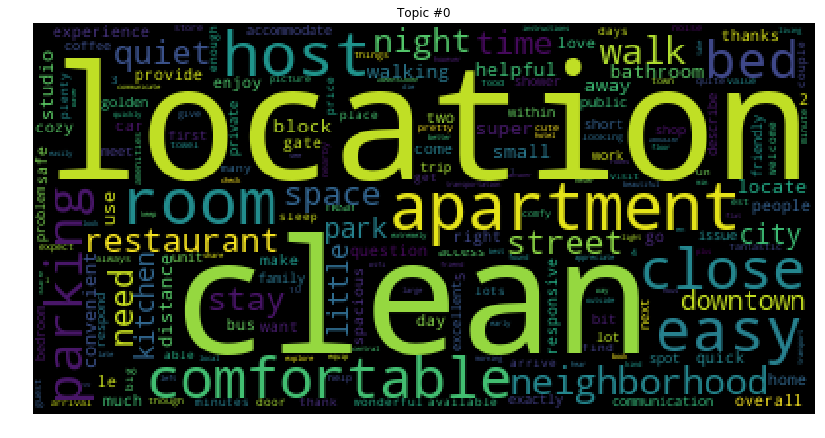

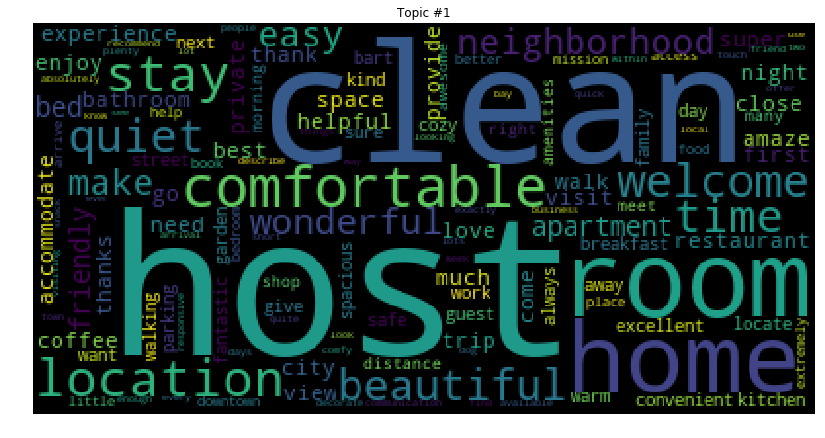

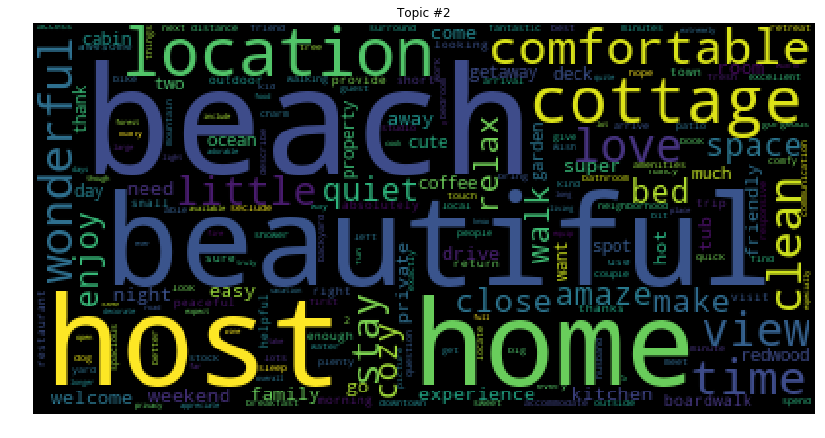

In [102]:
topics_3.word_cloud(num_of_topics=3)

In [137]:
# Identify top 5 topics

topics_5 = TopicModelEngine(X)
lda_5 = topics_5.LDA_model(num_of_topics=5, 
                              num_passes=10,
                              stop_words=total_words_to_exclude)
topics_5.print_topics(num_of_words=10)

TypeError: 'LdaModel' object is not callable

In [ ]:
topics_5.word_cloud(num_of_topics=5)

In [117]:
topics_5.dictionary

In [115]:
for i in topics_5.dictionary:
    print (topics_5.dictionary[i])

1
100
12
18th
2
20
24th
25
3
4
5
able
absolutely
access
accessible
accommodate
actually
addition
additionally
adorable
adore
advice
advise
affordable
afraid
airport
allow
almost
along
already
always
amaze
ambience
amour
answer
anywhere
apartment
appreciate
approachable
approximately
aptly
area
arrange
arrangement
arrival
arrive
art
artifact
artist
artistic
artistry
arty
ask
atmosphere
attend
attentive
au
australia
automate
available
away
awesome
b
backyard
bars
bart
base
basis
bathroom
bay
beat
beautiful
beautifully
bed
bedroom
believe
belle
berlin
besides
best
better
beyond
big
birthday
bit
block
boil
bonus
book
booking
boutique
breakfast
breeze
bright
brilliant
bring
brown
browsing
building
bus
busy
c
cafe
california
call
calm
calming
cancel
car
care
carefully
castro
cat
celebration
center
centrally
centre
cereal
certainly
chance
change
charge
charm
chat
check
cheer
cheerful
christian
church
ciao
city
clean
cleanly
clock
close
cloud
coffee
collection
combat
come
comfortable
comfy
com

trendy
trick
tuck
turn
type
unbearable
unbelievably
uncle
uncomfortable
understatement
unexpected
unforgettable
unfortunate
union
unit
university
unlike
unlock
unusual
unusually
unwind
upstairs
urban
user
utilize
v
vacate
vacation
vacationing
vacuum
valentine
variety
various
vary
vase
ventilation
venture
venue
vermont
version
vet
vice
viewing
visitor
vista
visually
walkway
wandering
warmhearted
warmly
warmth
warn
washer
washing
ways
wealth
wearing
wedding
wee
weekly
weird
west
wharf
wherever
whimsical
wide
wife
willing
wine
wireless
wise
woman
wont
word
words
working
workout
worrying
worst
write
writing
wrong
yard
years
yes
yoga
yummy
1000
11
13
14
150
16
19
21st
40
49
4th
50
65
66
7
70
71
accord
accurately
acquaint
active
adult
advertisement
aesthetic
affect
afternoon
afterwards
age
aged
akin
al
alarm
allergy
alt
alternative
altogether
aluminum
anticipate
appliance
approaching
arbitration
architecture
assortment
atlas
attending
auditorium
aug
australian
authentically
av
avoid
baby
bak

europe
extravagantly
featherbed
fluffy
massive
pancake
reed
shades
swear
thereafter
wary
willingly
26
39
40th
75
80
90
accidentally
ace
aching
adjective
afar
agency
airline
annum
apologetic
apologize
apply
asian
attract
attractively
backpack
bake
barbecue
bartender
baseball
bedside
being
belongings
beneficial
bewilder
blogger
bloom
brewery
burn
burning
calf
candlestick
cant
capture
cardigan
carte
caution
cerise
chinese
chip
chocolate
chutney
cityscape
clutter
cocktail
coffeehouse
communications
compatible
complain
complicate
complimentary
comprise
compromise
computer
confiture
consume
consummate
convention
cooker
cords
correctly
count
courteous
courtesy
cram
credit
crooked
crouch
crt
crucial
culinary
curb
daddy
dec
definite
depth
donne
drown
dude
editor
educate
effective
efficiency
elderly
electronics
emergency
emptying
encore
enthusiastic
environs
epitome
essen
establish
ethnic
eve
exclusive
exploration
explorer
extension
fail
fifth
fillmore
fleet
flop
folder
freelance
frequently
fryi

creaky
distress
divert
douche
dramatically
dynamics
ex
faucet
flaky
fur
gigantic
gloomy
good
gripes
hangar
homer
humans
inclusive
infant
irk
localisation
loudly
mate
net
nevada
nosy
noteworthy
nova
nozzle
obsolete
oct
offset
oftentimes
openness
outrageous
partly
perform
poverty
precarious
profession
rapport
realise
rester
rusty
scummy
sebs
sept
snob
spell
sponsor
sunray
thoroughfare
toilette
trek
uninviting
unreasonable
unreliable
vinegar
weary
wellness
whereabouts
ambulance
bin
brownie
bumble
companion
competitively
conclude
detergent
devote
distant
diversify
ed
elegantly
engine
errand
feline
godsend
gym
habitant
initiate
innovative
joining
limo
lonely
lucy
method
moreen
offside
ottoman
pic
proudly
r
reap
redo
refurbish
regina
retirement
rome
sprocket
strand
telegraph
translate
witty
200
abnormally
adapt
alternatively
balloon
bleu
bond
border
bundle
consent
discovery
entail
gates
headquarters
heighten
hippy
interpret
jacobs
karen
landlady
mask
mildew
oak
pregnant
protector
publishing


consign
cop
dare
daydreaming
defer
dominoes
drinkable
drunken
dwarf
effect
emerge
endure
falls
faulty
festivity
firmness
flirtation
flush
flutter
flywheel
freshman
germ
glaze
greyhound
grunt
gypsy
headboard
hookah
ii
inconveniently
insecure
intimacy
irrespective
jan
laguna
liner
literary
matins
melissa
mould
musician
nightcap
oblivious
offense
oldish
onwards
packer
partially
patrol
pertinent
ploy
polishing
portrait
propose
ras
recline
reliably
rickety
riding
riff
role
royalty
sacrifice
sensor
shabbily
shorts
skittle
sleek
soil
soundproof
sparrow
spill
spit
spout
squishy
stark
steadily
steady
stiffen
sublet
sweater
therapeutic
thumbtack
tippy
ultimo
unacceptably
uncomfortably
valve
washbasin
washcloth
zuni
advert
amble
commission
curling
geography
ordinate
oreo
pushy
remedy
removable
summit
transitional
unclog
wallet
76
77
abrasive
airs
alcove
antigua
auberge
bambino
barren
bottleneck
boule
cappuccino
carina
chaise
col
complement
contentious
creaking
creek
crossroad
dodge
downstair
draf

drunkard
earl
ehrlich
erratic
haw
hazardous
hem
heritage
intentional
marquis
mister
mugging
onion
otter
podcast
proceedings
separately
stealing
straggler
teal
threat
transplantation
unease
11th
ash
bb
botanic
brash
brazil
brood
consumption
coupe
eritrean
ethnicity
floss
grinding
houseplant
manna
medley
memorably
modem
molding
nantes
obstacle
ordinarily
proposition
slumber
tart
teenaged
therefor
undersell
vine
vomit
assiduous
belly
brainwash
candour
cocoa
commons
delineate
dirt
disaster
incorporate
inhabit
lousy
messenger
ng
nickel
nj
painlessly
preoccupy
prisoner
proverbial
pt
redeye
restock
simultaneous
systematically
tarnish
useable
virginity
wasting
width
zipper
accountable
ally
anaheim
anonymity
backpacker
bough
calmness
chilean
communally
communicable
cub
cynthia
debunk
deprive
distribution
dynamism
economize
filling
flavour
hone
noiseless
nourishment
nw
outsider
palpably
peanut
photographer
predispose
prop
sow
terminus
terrier
terse
thankfulness
vocation
wizard
zoom
intelligently

shrubbery
buildup
informer
preventative
pronounce
rim
sanitarium
taxon
victor
victory
unbroken
discard
headlamp
irresistible
latvian
arsenal
blackbird
bourbon
bridal
consortium
cookery
coverlet
foursome
jokingly
obnoxiously
ontario
passerby
roasting
secondment
shay
speedily
storied
veg
verge
wen
hela
branching
conrad
reorganize
levi
81
aback
artery
distinctiveness
dong
gorge
ingenious
lasagna
mamma
nuptials
oversea
owen
panda
pasty
roma
stem
vend
vulture
awestruck
backache
cure
custard
emu
hatching
hunter
impatient
multifaceted
nuclear
planter
river
stretching
superpower
unacceptable
usability
springboard
raja
89
appose
boo
choc
diffidently
flame
footboard
gradually
hankering
inviolable
lyric
reclusive
rev
sedate
seductive
straightener
bend
boiling
buffalo
chug
custodial
enfilade
footage
fuchsia
grandeur
inspect
mahogany
ornate
protea
sympathetically
veery
bourgeois
conceit
conversely
crick
ferocious
interdiction
introuvable
liao
mazy
mischievous
ramshackle
stout
uptight
wing
46th
cali

onset
hydrant
ola
anonym
ax
housework
railway
bvd
concurrently
defend
diabetic
emanate
filthiness
justification
lockup
mishmash
occupational
permeant
posing
pouf
preventive
pry
ratty
rotting
rover
saucepan
scum
seed
sienna
squirt
superficially
thinning
tread
untouched
nee
digger
ecosystem
carpentry
lovebird
streetlight
wispy
urging
bellman
buttermilk
cult
fund
admirably
ameliorate
apprentice
bulky
caravan
crisis
earnest
escapade
gradual
hurrah
ibuprofen
illusive
renewable
sunup
sustainable
chased
clumsiness
methodically
socialising
supplier
trumpet
valiantly
sequoia
snatch
truncate
backbone
combining
overstate
pisces
trivially
coquette
prostitute
independency
diagonally
ref
upland
arranger
dashboard
filthily
galere
hazard
liability
tighten
unventilated
dona
gilman
lien
payable
pointless
tallin
windshield
edit
incertain
sleepiness
erase
sane
bestow
kendall
pul
solidify
backroom
brute
deteriorate
intervention
holistic
ionic
midstream
hooker
promoter
spiller
crookedly
clueless
coax
iterat

indoctrination
cambrian
curate
dg
hershey
infectiously
athlete
joss
yesteryear
outhouse
edwards
peri
kota
aurora
minnesotan
affirmative
corkboard
mastoid
unmediated
comprehensible
formation
meridian
snacker
clone
bennington
faintly
rivera
teleconference
anemic
sanitation
bey
celt
paraphernalia
intuit
piazza
substandard
torso
concession
alexandria
kadai
verity
bicycling
crus
monotony
parisian
playbook
storybook
samaritan
dumps
contour
undeniable
hoarder
meaningfully
abuse
amphitheatre
sterilize
principe
mining
overstuff
filth
motivator
parterre
relive
triumphant
unintentionally
galileo
siamese
rupture
calcium
plunger
bisect
booklover
bordeaux
expo
grieve
leigh
lytton
ml
mourn
personalty
purity
shoehorn
toggle
murder
bradford
spongy
synthetic
barker
repertoire
uniform
leftmost
turret
blindly
rejuvenation
undercharge
bipolar
motif
ornamentation
ozarks
trumpets
archaic
butch
edgar
origami
painstakingly
twosome
collapsible
sonny
wetland
fertilizer
hilariously
pea
teacup
tyre
consistence
lec

headlight
conveyance
moodiness
dismissive
dozer


In [122]:
topics_5.corpus[2792]

[(4, 1),
 (28, 1),
 (31, 5),
 (41, 1),
 (44, 1),
 (45, 1),
 (60, 3),
 (68, 1),
 (71, 4),
 (73, 2),
 (79, 1),
 (82, 1),
 (88, 1),
 (95, 1),
 (131, 3),
 (134, 2),
 (136, 1),
 (139, 3),
 (140, 2),
 (144, 1),
 (173, 1),
 (177, 3),
 (178, 1),
 (181, 2),
 (187, 1),
 (193, 1),
 (194, 2),
 (208, 2),
 (216, 2),
 (224, 1),
 (228, 1),
 (231, 1),
 (241, 2),
 (242, 1),
 (246, 1),
 (247, 1),
 (253, 1),
 (254, 2),
 (268, 3),
 (269, 1),
 (270, 2),
 (278, 3),
 (283, 1),
 (288, 1),
 (297, 4),
 (305, 1),
 (312, 1),
 (314, 2),
 (319, 2),
 (320, 4),
 (323, 1),
 (324, 1),
 (327, 1),
 (347, 3),
 (358, 8),
 (362, 1),
 (364, 1),
 (366, 8),
 (374, 1),
 (385, 1),
 (389, 1),
 (397, 1),
 (404, 1),
 (413, 2),
 (416, 1),
 (424, 1),
 (430, 2),
 (431, 3),
 (441, 1),
 (443, 1),
 (445, 1),
 (446, 1),
 (447, 2),
 (450, 2),
 (453, 1),
 (455, 2),
 (456, 2),
 (462, 1),
 (478, 2),
 (480, 1),
 (498, 2),
 (500, 1),
 (509, 3),
 (515, 1),
 (528, 1),
 (531, 2),
 (541, 1),
 (548, 1),
 (551, 1),
 (558, 1),
 (560, 1),
 (566, 3),
 (5

In [129]:
topics_5.lda(topics_5.corpus[233])

TypeError: 'LdaModel' object is not callable

In [133]:
topics_5.lda_corpus

AttributeError: 'TopicModelEngine' object has no attribute 'lda_corpus'